- **제출자: AI26_오준서**  
- **제출일: 2025-06-16**  
- **PBL06 : 고객 구매 데이터를 활용한 매출 및 기여도 분석 (월별 매출과 고객별 누적 기여도 시각화)**
- **고객의 구매 데이터를 기반으로 마케팅 전략 수립을 위한 월별 매출 및 고객별 누적 기여도 분석이 필요**
    - **CustomerSalesAnalysis 클래스 정의**
    - **데이터 항목 : 고객명, 구매일자, 상품명, 수량, 단가**
    - **분석 및 시각화 :**
        - **월별 매출 총합 막대 그래프**
        - **고객별 누적 매출 파이 차트**

- **해결 가이드**
    - **DataFrame 초기화 및 총매출 파생열 생성**
    - **groupby을 활용한 집계 및 시각화(bar, pie)**
    
- 시각화 정확도 및 정보 전달력:
    > 파이 차트/막대 그래프 구성의 명확성
- 객체지향 설계 및 데이터 처리력:
    > 클래스 사용 여부, 매출 계산 정확성
- 결과 해석 및 문서화:
    > 분석 결과에 대한 해석 가능성, 출력 메시지 및 주석

**두 가지 버전으로 했습니다.**
- **랜덤 난수를 사용**
- **실제 데이터셋을 캐글에서 가져와 (csv) 실제 분석 및 시각화**

- MoM (Month voer Month) : 전월 대비 매출 증감 비율
    - MoM 성장율 (%) = (이번달 매출 - 전월 매출) / 전월 매출 × 100
- 3M_MA : 3개월 이동 평균 (최근 3개월 간 매출의 평균값을 구해 매출의 추세를 부드럽게 나타낸다.)
    - 3M_MA(3월) = (1월 매출 + 2월 매출 + 3월 매출) / 3

=== 월별 매출 분석 ===


,연월,총매출,MoM_성장율(%),3M_MA,MoM_성장율,_3M_MA
0,2024-01,"2,814,936원",0.00,2814936,0.0%,"2,814,936원"
1,2024-02,"2,398,661원",-14.79,2606798,-14.8%,"2,606,798원"
2,2024-03,"1,883,133원",-21.49,2365576,-21.5%,"2,365,576원"
3,2024-04,"2,638,458원",40.11,2306750,40.1%,"2,306,750원"
4,2024-05,"3,048,686원",15.55,2523425,15.6%,"2,523,425원"
5,2024-06,"2,471,451원",-18.93,2719531,-18.9%,"2,719,531원"
6,2024-07,"2,967,470원",20.07,2829202,20.1%,"2,829,202원"
7,2024-08,"2,427,097원",-18.21,2622006,-18.2%,"2,622,006원"
8,2024-09,"2,077,508원",-14.40,2490691,-14.4%,"2,490,691원"
9,2024-10,"2,953,531원",42.17,2486045,42.2%,"2,486,045원"


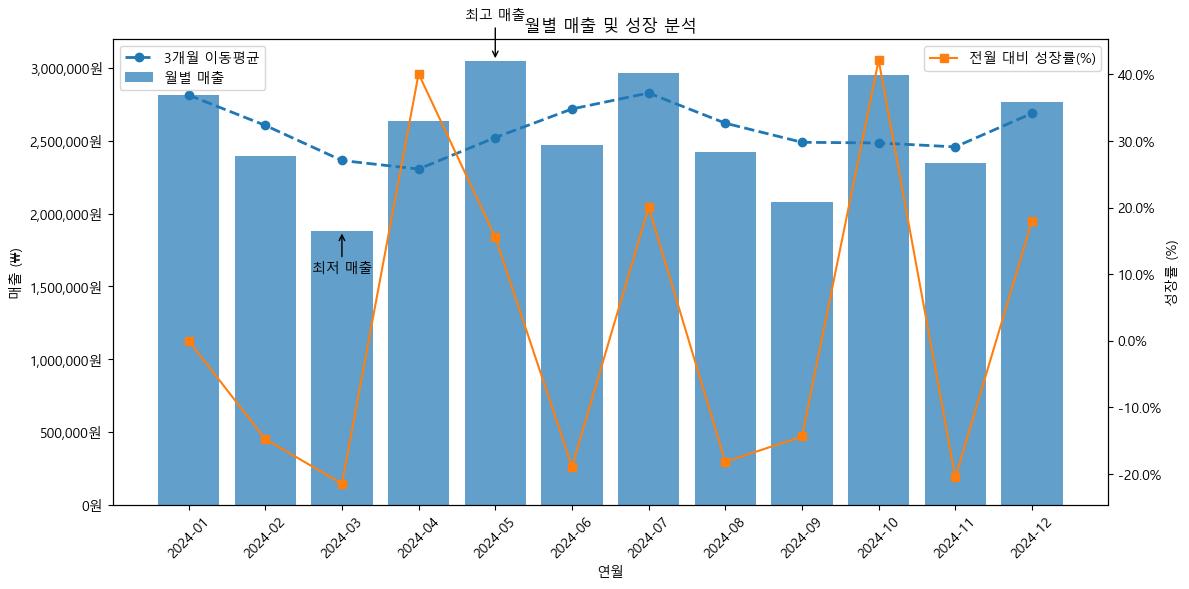


=== 고객별 누적 매출 기여도 (Top 50%) ===


,고객명,총매출,기여도(%)
0,고객11,"1,117,157원",3.63
1,고객7,"896,411원",2.91
2,고객21,"853,374원",2.77
3,고객33,"837,327원",2.72
4,고객23,"813,564원",2.64
5,고객19,"806,922원",2.62
6,고객34,"800,240원",2.60
7,고객32,"791,289원",2.57
8,고객43,"786,641원",2.55
9,고객22,"764,799원",2.48


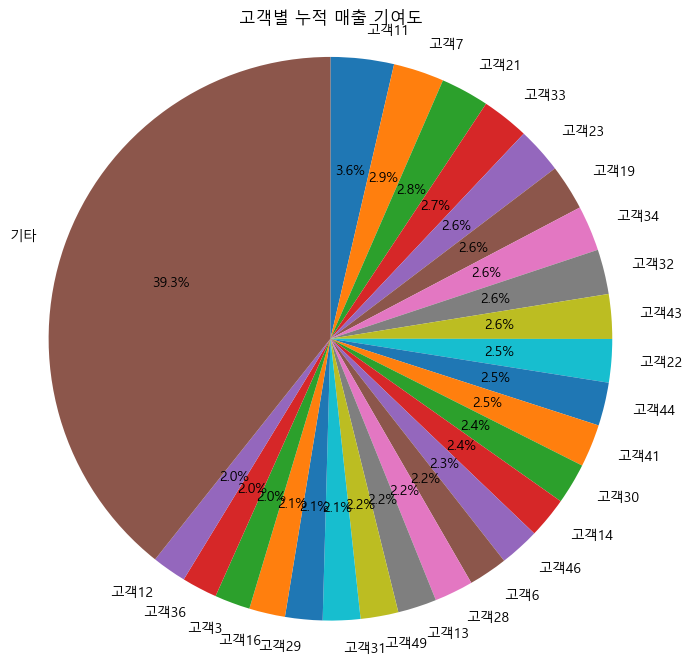

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import FuncFormatter

def generate_sample_data(
    num_records: int = 1000,
    num_customers: int = 50,
    num_products: int = 24,
    start_date: str = "2024-01-01",
    end_date: str = "2024-12-31"
) -> pd.DataFrame:
    """
    샘플 고객 구매 데이터 랜덤 생성
    """
    customers = [f"고객{i+1}" for i in range(num_customers)]
    products  = [f"상품{j+1}" for j in range(num_products)]
    dates     = pd.date_range(start=start_date, end=end_date, freq="D")

    data = {
        "고객명":   np.random.choice(customers, size=num_records),
        "구매일자": np.random.choice(dates,     size=num_records),
        "상품명":   np.random.choice(products,  size=num_records),
        "수량":     np.random.randint(1, 11,    size=num_records),
        "단가":     np.random.randint(1000, 10001, size=num_records)
    }
    return pd.DataFrame(data)

class CustomerSalesAnalysis:
    """
    고객 구매 데이터를 기반으로
      1) 월별 매출 합계 분석 및 강화 시각화
      2) 고객별 매출 기여도 분석 및 시각화
    """

    def __init__(self, df: pd.DataFrame, top_ratio: float = 0.5):
        """
        :param df: 고객 구매 DataFrame (고객명, 구매일자, 상품명, 수량, 단가)
        :param top_ratio: 전체 고객 대비 상위 몇 %를 표시할지 (0~1)
        """
        self.df = df.copy()
        self.top_ratio = top_ratio
        self._preprocess_data()

    def _preprocess_data(self):
        """
        1) 구매일자 → datetime
        2) 총매출 컬럼 생성
        3) 연월(YYYY-MM) 컬럼 생성
        """
        self.df['구매일자'] = pd.to_datetime(self.df['구매일자'])
        self.df['총매출']   = self.df['수량'] * self.df['단가']
        self.df['연월']     = self.df['구매일자'].dt.to_period('M').astype(str)

    def get_monthly_revenue(self) -> pd.DataFrame:
        """
        모든 월 포함 월별 매출, 성장률, 이동평균 계산
        """
        # 1) 실제 매출 집계
        mon = (
            self.df
            .groupby('연월', as_index=False)['총매출']
            .sum()
        )
        # 2) 누락 월 0원 채우기
        first = self.df['구매일자'].min().to_period('M')
        last  = self.df['구매일자'].max().to_period('M')
        all_months = pd.period_range(first, last, freq='M').astype(str)
        full = pd.DataFrame({'연월': all_months})
        full = full.merge(mon, on='연월', how='left').fillna(0)
        full['총매출'] = full['총매출'].astype(int)
        # 3) 전월 대비 성장률(%)
        full['MoM_성장율(%)'] = (full['총매출'].pct_change().fillna(0) * 100).round(2)
        # 4) 3개월 이동평균
        full['3M_MA'] = full['총매출'].rolling(window=3, min_periods=1).mean().astype(int)
        return full

    def plot_monthly_revenue_enhanced(self, df_mon: pd.DataFrame):
        """
        월별 매출 + 3M 이동평균(점선) + 전월 대비 성장률(우축) + 최고/최저 주석
        """
        fig, ax1 = plt.subplots(figsize=(12, 6))
        # Y축 포맷터 (₩)
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,d}원"))
        # Bar: 월별 매출
        ax1.bar(df_mon['연월'], df_mon['총매출'], label='월별 매출', alpha=0.7)
        # Dashed line: 3M MA
        ax1.plot(df_mon['연월'], df_mon['3M_MA'], '--o',
                 label='3개월 이동평균', linewidth=2)
        ax1.set_xlabel('연월')
        ax1.set_ylabel('매출 (₩)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.legend(loc='upper left')

        # 우측 축: 성장률
        ax2 = ax1.twinx()
        ax2.plot(df_mon['연월'], df_mon['MoM_성장율(%)'], '-s', color='C1',
                 label='전월 대비 성장률(%)')
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f"{y:.1f}%"))
        ax2.set_ylabel('성장률 (%)')
        ax2.legend(loc='upper right')

        # 최고/최저 매출 주석
        idx_max = df_mon['총매출'].idxmax()
        idx_min = df_mon['총매출'].idxmin()
        for idx, txt in [(idx_max, '최고 매출'), (idx_min, '최저 매출')]:
            ax1.annotate(
                txt,
                xy=(df_mon['연월'][idx], df_mon['총매출'][idx]),
                xytext=(0, 30 if txt=='최고 매출' else -30),
                textcoords='offset points',
                ha='center',
                arrowprops=dict(arrowstyle='->')
            )

        plt.title('월별 매출 및 성장 분석')
        plt.tight_layout()
        plt.show()

    def get_customer_contribution(self) -> pd.DataFrame:
        """
        전체 고객 중 top_ratio 비율만큼 상위 고객 + 기타로 기여도 계산
        """
        cust = (
            self.df
            .groupby('고객명', as_index=False)['총매출']
            .sum()
            .sort_values('총매출', ascending=False)
        )
        total = cust['총매출'].sum()
        n_customers = cust.shape[0]
        top_n = max(1, int(n_customers * self.top_ratio))
        top = cust.head(top_n).copy()
        others = cust['총매출'][top_n:].sum()
        if others > 0:
            extra = pd.DataFrame([{'고객명':'기타', '총매출':others}])
            top = pd.concat([top, extra], ignore_index=True)
        top['기여도(%)'] = (top['총매출'] / total * 100).round(2)
        return top

    def plot_customer_contribution(self, df_contrib: pd.DataFrame):
        """
        고객별 매출 기여도 파이 차트
        """
        plt.figure(figsize=(8, 8))
        plt.pie(
            df_contrib['총매출'],
            labels=df_contrib['고객명'],
            autopct='%1.1f%%',
            startangle=90,
            counterclock=False
        )
        plt.title('고객별 누적 매출 기여도')
        plt.axis('equal')
        plt.show()

    def run_analysis(self):
        # 1) 월별 매출 강화 시각화
        df_mon = self.get_monthly_revenue()
        print("=== 월별 매출 분석 ===")
        display(df_mon.assign(
            총매출=df_mon['총매출'].map(lambda x: f"{x:,.0f}원"),
            MoM_성장율=df_mon['MoM_성장율(%)'].map(lambda x: f"{x:.1f}%"),
            _3M_MA=df_mon['3M_MA'].map(lambda x: f"{x:,.0f}원")
        ))
        self.plot_monthly_revenue_enhanced(df_mon)

        # 2) 고객별 누적 매출 기여도
        df_contrib = self.get_customer_contribution()
        print("\n=== 고객별 누적 매출 기여도 (Top {:.0%}) ===".format(self.top_ratio))
        display(df_contrib.assign(
            총매출=df_contrib['총매출'].map(lambda x: f"{x:,.0f}원")
        ))
        self.plot_customer_contribution(df_contrib)


if __name__ == "__main__":
    # 1) 샘플 데이터 생성
    sample_df = generate_sample_data()

    # 2) 분석 실행 (상위 50% 고객 표시)
    analysis = CustomerSalesAnalysis(sample_df, top_ratio=0.5)
    analysis.run_analysis()


- 실제 데이터를 기반으로 한 시각화 (AdventureWorks 2022 Denormalized)
- 구매일자: sales_order_date
- 상품명: product_name
- 수량: quantity
- 단가: unit_price
- 고객명: 별도 CustomerName 컬럼은 없지만, 대신 reseller_name 필드를 고객명으로 사용

=== 월별 매출 분석 ===


,연월,총매출_표시,MoM_성장률_표시,이동평균_표시
0,2017-07,"489,328원",0.0%,"489,328원"
1,2017-08,"1,540,072원",214.7%,"1,014,700원"
2,2017-09,"1,166,332원",-24.3%,"1,065,244원"
3,2017-10,"844,833원",-27.6%,"1,183,745원"
4,2017-11,"2,325,755원",175.3%,"1,445,640원"
5,2017-12,"1,703,435원",-26.8%,"1,624,674원"
6,2018-01,"713,230원",-58.1%,"1,580,806원"
7,2018-02,"1,900,794원",166.5%,"1,439,153원"
8,2018-03,"1,455,280원",-23.4%,"1,356,434원"
9,2018-04,"883,011원",-39.3%,"1,413,028원"


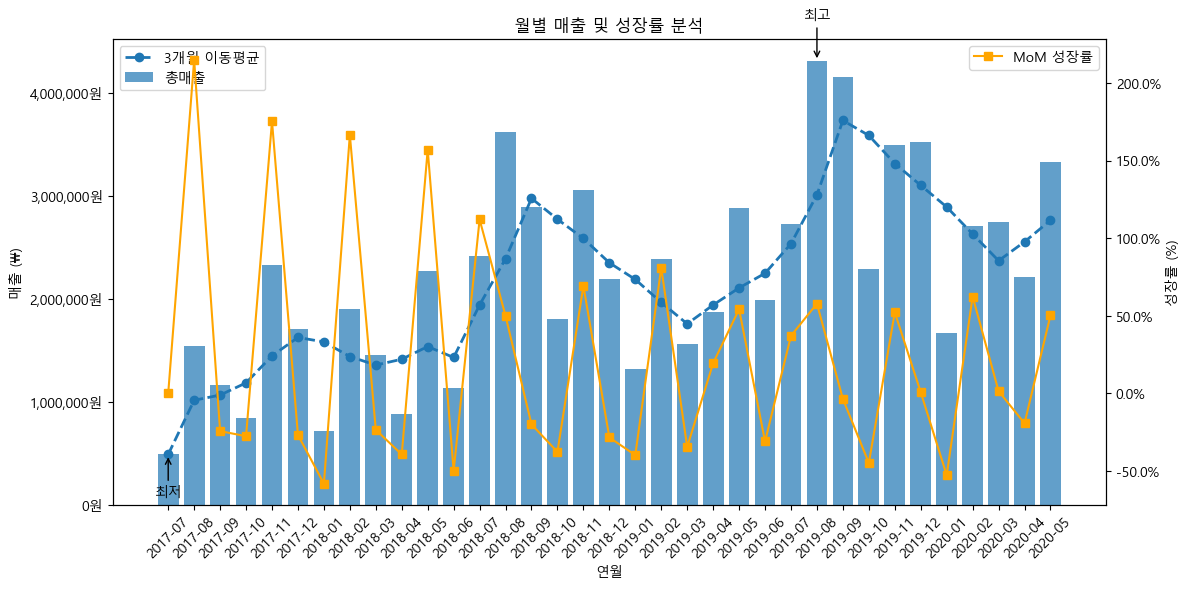


=== 고객별 매출 기여도 (상위 10명 + 기타) ===


,reseller_name,총매출_표시,기여도(%)
0,Brakes and Gears,"882,274원",1.14
1,Totes & Baskets Company,"817,125원",1.05
2,Retail Mall,"803,767원",1.04
3,Vigorous Exercise Company,"794,910원",1.03
4,Excellent Riding Supplies,"773,398원",1.00
5,Thorough Parts and Repair Services,"741,360원",0.96
6,Corner Bicycle Supply,"736,865원",0.95
7,"Health Spa, Limited","735,233원",0.95
8,Fitness Toy Store,"731,635원",0.94
9,Latest Sports Equipment,"725,937원",0.94


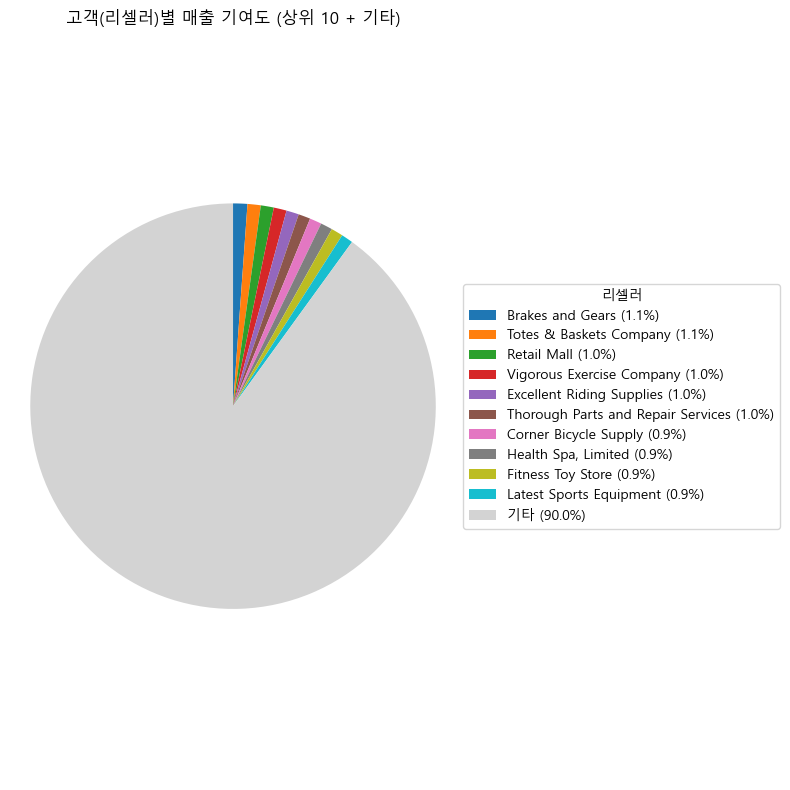


=== 전체 고객별 매출 기여도 ===


,reseller_name,총매출_표시,기여도(%)
0,Brakes and Gears,"882,274원",1.14
1,Totes & Baskets Company,"817,125원",1.05
2,Retail Mall,"803,767원",1.04
3,Vigorous Exercise Company,"794,910원",1.03
4,Excellent Riding Supplies,"773,398원",1.00
...,...,...,...
625,Large Bike Shop,58원,0.00
626,Eleventh Bike Store,58원,0.00
627,Parts Shop,24원,0.00
628,Essential Bike Works,22원,0.00


In [ ]:
from turtle import color
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# 한글 폰트 및 유니코드 마이너스 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

class CustomerSalesAnalysisAdventureWorks:
    """
    AdventureWorks 2022 Denormalized 데이터 기반
    1) 월별 매출 분석 + 이동평균 + 성장률
    2) 리셀러(고객)별 누적 매출 기여도 (상위 N명 + 기타)
    """

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self._preprocess()

    def _preprocess(self):
        """데이터 정제 및 전처리"""
        self.df['sales_order_date'] = pd.to_datetime(self.df['sales_order_date'], errors='coerce')
        self.df.dropna(subset=['sales_order_date'], inplace=True)

        def clean_money(col):
            return self.df[col].replace(r'[\$,]', '', regex=True).astype(float)

        self.df['unit_price'] = clean_money('unit_price')
        self.df['total_sales'] = clean_money('total_sales')

        self.df['연월'] = self.df['sales_order_date'].dt.to_period('M').astype(str)

    def get_monthly_revenue(self):
        """월별 매출 + 성장률 + 3개월 이동평균"""
        monthly = (
            self.df.groupby('연월', as_index=False)['total_sales']
            .sum()
            .rename(columns={'total_sales': '총매출'})
        )
        monthly['MoM_성장률(%)'] = (monthly['총매출'].pct_change().fillna(0) * 100).round(2)
        monthly['3M_이동평균'] = monthly['총매출'].rolling(3, min_periods=1).mean().astype(int)
        return monthly

    def plot_monthly_revenue(self, df: pd.DataFrame):
        """월별 매출 + 성장률 + 이동평균 시각화"""
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.bar(df['연월'], df['총매출'], label='총매출', alpha=0.7)
        ax1.plot(df['연월'], df['3M_이동평균'], '--o', label='3개월 이동평균', linewidth=2)
        ax1.set_ylabel('매출 (₩)')
        ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}원"))
        ax1.set_xlabel('연월')
        ax1.tick_params(axis='x', rotation=45)
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.plot(df['연월'], df['MoM_성장률(%)'], '-s', color='orange', label='MoM 성장률')
        ax2.set_ylabel('성장률 (%)')
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}%"))
        ax2.legend(loc='upper right')

        idx_max = df['총매출'].idxmax()
        idx_min = df['총매출'].idxmin()
        for idx, txt in [(idx_max, '최고'), (idx_min, '최저')]:
            ax1.annotate(txt, xy=(df['연월'][idx], df['총매출'][idx]),
                         xytext=(0, 30 if txt == '최고' else -30),
                         textcoords='offset points', ha='center',
                         arrowprops=dict(arrowstyle='->'))

        plt.title("월별 매출 및 성장률 분석")
        plt.tight_layout()
        plt.show()

    def get_reseller_contribution(self, top_n: int = 10):
        """상위 N개 리셀러 + 기타 매출 기여도 계산"""
        sales = (
            self.df.groupby('reseller_name', as_index=False)['total_sales']
            .sum()
            .rename(columns={'total_sales': '총매출'})      
            .sort_values('총매출', ascending=False)            
        )

        total = sales['총매출'].sum()
        top_df = sales.head(top_n).copy()
        others_sum = sales['총매출'][top_n:].sum()

        if others_sum > 0:
            others = pd.DataFrame([{'reseller_name': '기타', '총매출': others_sum}])
            top_df = pd.concat([top_df, others], ignore_index=True)

        top_df['기여도(%)'] = (top_df['총매출'] / total * 100).round(2)
        return top_df


    def plot_reseller_contribution(self, df: pd.DataFrame):
        """
        고객별 매출 기여도 파이차트
        - 상위 고객: colormap으로 서로 다른 색상
        - 기타: lightgray
        - %는 파이 내부에 넣지 않고 → 범례에 같이 표기
        """
        plt.figure(figsize=(8, 8))

        # 색상 정의
        n = len(df)
        cmap = mpl.colormaps.get_cmap('tab20')
        colors = [cmap(i / (n - 1)) for i in range(n - 1)] + ['lightgray']
        
        # 퍼센트 문자열 생성
        legend_labels = [
            f"{row['reseller_name']} ({row['기여도(%)']:.1f}%)"
            for _, row in df.iterrows()
        ]

        # 파이차트 (라벨 없음, 퍼센트도 없음)
        wedges, _ = plt.pie(
            df['총매출'],
            labels=None,
            startangle=90,
            counterclock=False,
            colors=colors
        )

        # 범례로 리셀러 이름 + % 표시
        plt.legend(
            wedges,
            legend_labels,
            title="리셀러",
            loc="center left",
            bbox_to_anchor=(1, 0.5)
        )

        plt.title("고객(리셀러)별 매출 기여도 (상위 10 + 기타)")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

    def get_all_reseller_contribution(self):
        """전체 고객별 매출 기여도 계산"""
        sales = (
            self.df.groupby('reseller_name')['total_sales']
            .sum().sort_values(ascending=False)
        )
        total = sales.sum()
        df_all = sales.reset_index(name='총매출')
        df_all['기여도(%)'] = (df_all['총매출'] / total * 100).round(2)
        return df_all

    def get_all_reseller_contribution(self):
        """전체 리셀러 매출 기여도 테이블"""
        sales = self.df.groupby('reseller_name')['total_sales'].sum().sort_values(ascending=False)
        total = sales.sum()
        df_all = sales.reset_index(name='총매출')
        df_all['기여도(%)'] = (df_all['총매출']/total*100).round(2)
        return df_all

    def run(self, top_n:int=10):
        """전체 분석 실행"""
        print('=== 월별 매출 분석 ===')
        df_mon=self.get_monthly_revenue()
        display(df_mon.assign(
            총매출_표시=df_mon['총매출'].map(lambda x:f"{x:,.0f}원"),
            MoM_성장률_표시=df_mon['MoM_성장률(%)'].map(lambda x:f"{x:.1f}%"),
            이동평균_표시=df_mon['3M_이동평균'].map(lambda x:f"{x:,.0f}원")
        )[['연월','총매출_표시','MoM_성장률_표시','이동평균_표시']])
        self.plot_monthly_revenue(df_mon)
        print(f"\n=== 고객별 매출 기여도 (상위 {top_n}명 + 기타) ===")
        df_top=self.get_reseller_contribution(top_n)
        display(df_top.assign(
            총매출_표시=df_top['총매출'].map(lambda x:f"{x:,.0f}원")
        )[['reseller_name','총매출_표시','기여도(%)']])
        self.plot_reseller_contribution(df_top)
        print('\n=== 전체 고객별 매출 기여도 ===')
        df_all=self.get_all_reseller_contribution()
        display(df_all.assign(
            총매출_표시=df_all['총매출'].map(lambda x:f"{x:,.0f}원")
        )[['reseller_name','총매출_표시','기여도(%)']])


# 실행 예시
if __name__ == "__main__":
    df = pd.read_csv("adventureworks_2022_denormalized.csv", sep='|', encoding='utf-8')
    analysis = CustomerSalesAnalysisAdventureWorks(df)
    analysis.run(top_n=10)  # 상위 10개 리셀러 + 기타 기준
